In [1]:
import pyarrow as pa
print(pa.__version__)

ImportError: DLL load failed while importing lib: The specified procedure could not be found.

In [1]:
# Packages
import dask.dataframe as dd
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

In [4]:
import vaex

In [151]:
import psutil

# Obtenir les informations sur la mémoire
memory_info = psutil.virtual_memory()

# Afficher la mémoire totale, utilisée et disponible en GB
total_memory = memory_info.total / (1024 ** 3)
used_memory = memory_info.used / (1024 ** 3)
available_memory = memory_info.available / (1024 ** 3)

print(f'Mémoire Totale: {total_memory:.2f} GB')
print(f'Mémoire Utilisée: {used_memory:.2f} GB')
print(f'Mémoire Disponible: {available_memory:.2f} GB')

Mémoire Totale: 15.40 GB
Mémoire Utilisée: 8.78 GB
Mémoire Disponible: 6.62 GB


In [123]:
# Afficher les tailles des objets en mémoire en parcourant une copie des clés du dictionnaire
all_objects = sys._getframe().f_globals.copy()
for obj_name, obj in all_objects.items():
    print(f'{obj_name}: {sys.getsizeof(obj) / 1024**2:.2f} MB')

__name__: 0.00 MB
__doc__: 0.00 MB
__package__: 0.00 MB
__loader__: 0.00 MB
__spec__: 0.00 MB
__builtin__: 0.00 MB
__builtins__: 0.00 MB
_ih: 0.00 MB
_oh: 0.00 MB
_dh: 0.00 MB
In: 0.00 MB
Out: 0.00 MB
get_ipython: 0.00 MB
exit: 0.00 MB
quit: 0.00 MB
open: 0.00 MB
_: 0.00 MB
__: 0.00 MB
___: 0.00 MB
__session__: 0.00 MB
_i: 0.00 MB
_ii: 0.00 MB
_iii: 0.00 MB
_i1: 0.00 MB
MovieLens_Imdb_path: 0.00 MB
name_basics_path: 0.00 MB
Imdb_path: 0.00 MB
MoviesLens_tconst_path: 0.00 MB
title_principals_path: 0.00 MB
MovieLens_Imdb2_DirectorsInfoReduced_path: 0.00 MB
_i2: 0.00 MB
json: 0.00 MB
getpass: 0.00 MB
hashlib: 0.00 MB
import_pandas_safely: 0.00 MB
__pandas: 0.00 MB
is_data_frame: 0.00 MB
dataframe_columns: 0.00 MB
dtypes_str: 0.00 MB
dataframe_hash: 0.00 MB
get_dataframes: 0.00 MB
_2: 0.00 MB
_i3: 0.00 MB
_i4: 0.00 MB
_4: 0.00 MB
_i5: 0.00 MB
dd: 0.00 MB
sys: 0.00 MB
pd: 0.00 MB
plt: 0.00 MB
sns: 0.00 MB
px: 0.00 MB
re: 0.00 MB
_i6: 0.00 MB
_6: 0.00 MB
_i7: 0.00 MB
_i8: 0.00 MB
_8: 0.00 MB

In [ ]:
# Libérer du mémoire 
import gc

# Supprimer l'objet volumineux
del imdb1

# Forcer le garbage collector à libérer la mémoire
gc.collect()

In [3]:
# Paths
MovieLens_Imdb_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/1. Unions/MovieLens_Imdb/MovieLens_Imdb1.feather'
name_basics_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/name_basics.feather'
Imdb_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/1. Unions/Imdb/01_title_basics_crew_ratings.feather'
MoviesLens_tconst_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/1. Unions/MovieLens_Imdb/0.Movies_tconst.feather'
title_principals_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/0. Exploration/title_principals.feather'

MovieLens_Imdb2_DirectorsInfoReduced_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/1. Unions/MovieLens_Imdb/MovieLens_Imdb2_DirectorsInfoReduced2.feather'


In [53]:
### 0.1. Recherche des noms des acteurs
# Lecture de titre_principals pour chercher le nom des actors & actress des films

titre_principals = pd.read_feather(title_principals_path, columns=['tconst', 'nconst', 'ordering', 'category', 'characters'])
titre_principals.head()


,tconst,nconst,ordering,category,characters
0,tt0000001,nm1588970,1,self,"[""Self""]"
1,tt0000001,nm0005690,2,director,None
2,tt0000001,nm0005690,3,producer,None
3,tt0000001,nm0374658,4,cinematographer,None
4,tt0000002,nm0721526,1,director,None


In [55]:
# Filtrer les lignes où 'category' est "actor", "actress" ou "self"
titre_principals = titre_principals[titre_principals['category'].isin(['actor', 'actress'])]  ## Avant j'avait pris 'self'

In [7]:
titre_principals.head()

,tconst,nconst,ordering,category,characters
13,tt0000005,nm0443482,1,actor,"[""Blacksmith""]"
14,tt0000005,nm0653042,2,actor,"[""Assistant""]"
16,tt0000007,nm0179163,1,actor,None
17,tt0000007,nm0183947,2,actor,None
23,tt0000008,nm0653028,1,actor,"[""Sneezing Man""]"


In [57]:
# Filtrer les acteurs qui ont un character identifié, pour essayer de rester avec les acteur principaux
titre_principals = titre_principals[titre_principals['characters'].notna()]

In [13]:
titre_principals['ordering'].max()

74

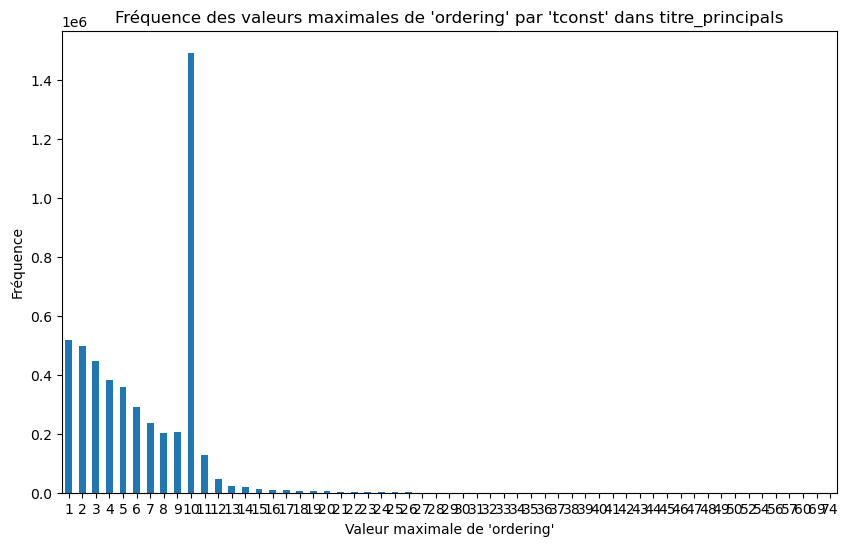

In [59]:
# Calcul de la valeur maximale de 'ordering' pour chaque 'tconst'
max_ordering_by_tconst = titre_principals.groupby('tconst')['ordering'].max()

# Calcul de la fréquence de chaque maximum de 'ordering'
ordering_frequency = max_ordering_by_tconst.value_counts().sort_index()

# Visualisation de la fréquence
plt.figure(figsize=(10, 6))
ordering_frequency.plot(kind='bar')
plt.title("Fréquence des valeurs maximales de 'ordering' par 'tconst' dans titre_principals")
plt.xlabel("Valeur maximale de 'ordering'")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)
plt.show()

In [17]:
titre_principals.info()
titre_principals.head()

<class 'pandas.core.frame.DataFrame'>
Index: 29682621 entries, 13 to 88291202
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   nconst      object
 2   ordering    Int64 
 3   category    object
 4   characters  object
dtypes: Int64(1), object(4)
memory usage: 1.4+ GB


,tconst,nconst,ordering,category,characters
13,tt0000005,nm0443482,1,actor,"[""Blacksmith""]"
14,tt0000005,nm0653042,2,actor,"[""Assistant""]"
23,tt0000008,nm0653028,1,actor,"[""Sneezing Man""]"
27,tt0000009,nm0063086,1,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
28,tt0000009,nm0183823,2,actor,"[""Mr. Hamilton""]"


In [61]:
# Tri du DataFrame par 'tconst' et 'ordering'
titre_principals = titre_principals.sort_values(by=['tconst', 'ordering']).reset_index(drop=True)
titre_principals.head(20)

,tconst,nconst,ordering,category,characters
0,tt0000005,nm0443482,1,actor,"[""Blacksmith""]"
1,tt0000005,nm0653042,2,actor,"[""Assistant""]"
2,tt0000008,nm0653028,1,actor,"[""Sneezing Man""]"
3,tt0000009,nm0063086,1,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
4,tt0000009,nm0183823,2,actor,"[""Mr. Hamilton""]"
5,tt0000009,nm1309758,3,actor,"[""Chauncey Depew - the Director of the New Yor..."
6,tt0000011,nm3692297,1,actor,"[""Acrobats""]"
7,tt0000014,nm0166380,1,actor,"[""The Gardener""]"
8,tt0000014,nm0244989,2,actor,"[""The Boy""]"
9,tt0000017,nm3691272,1,actor,"[""The boy""]"


In [63]:
# Filtrage pour obtenir les 3 premiers 'ordering' pour chaque 'tconst'
titre_principals = titre_principals.groupby('tconst').head(3).reset_index(drop=True)

titre_principals.info()
titre_principals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716140 entries, 0 to 12716139
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   tconst      object
 1   nconst      object
 2   ordering    Int64 
 3   category    object
 4   characters  object
dtypes: Int64(1), object(4)
memory usage: 497.2+ MB


,tconst,nconst,ordering,category,characters
0,tt0000005,nm0443482,1,actor,"[""Blacksmith""]"
1,tt0000005,nm0653042,2,actor,"[""Assistant""]"
2,tt0000008,nm0653028,1,actor,"[""Sneezing Man""]"
3,tt0000009,nm0063086,1,actress,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
4,tt0000009,nm0183823,2,actor,"[""Mr. Hamilton""]"


In [65]:
titre_principals = titre_principals.drop('ordering', axis=1)

In [25]:
### 0.2. Recherche les films dans les quels les acteurs ont travaillé

# 0.2.1. Lecture de name_basics pour chercher le nom des actors & actress
MoviesLens_tconst = pd.read_feather(MoviesLens_tconst_path)
MoviesLens_tconst.info()
MoviesLens_tconst.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 0 to 19989075
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdbId          26744 non-null  int64 
 1   imdb_tconst     26694 non-null  string
 2   imdb_directors  26664 non-null  string
dtypes: int64(1), string(2)
memory usage: 835.8 KB


,imdbId,imdb_tconst,imdb_directors
0,113497,tt0113497,nm0002653
1,112682,tt0112682,"nm0001988,nm0000466"
2,114746,tt0114746,nm0000416
3,114369,tt0114369,nm0000399
4,114814,tt0114814,nm0001741


In [67]:
### 0.2.2. Lire et fusionner la base des movieLens avec les acteurs par film
titre_principals = MoviesLens_tconst.merge(
    titre_principals,
    how='left',
    left_on='imdb_tconst',
    right_on='tconst'
)
titre_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75171 entries, 0 to 75170
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   imdbId          75171 non-null  int64 
 1   imdb_tconst     75121 non-null  object
 2   imdb_directors  75082 non-null  string
 3   tconst          73166 non-null  object
 4   nconst          73166 non-null  object
 5   category        73166 non-null  object
 6   characters      73166 non-null  object
dtypes: int64(1), object(5), string(1)
memory usage: 4.0+ MB


In [69]:
# Supprimer la colonne 'tconst' du résultat final
titre_principals = titre_principals.drop(columns=['tconst'])
titre_principals = titre_principals.drop(columns=['imdb_directors'])

# Renommer les colonnes dans le DataFrame résultant
titre_principals = titre_principals.rename(columns={
    'nconst': 'actors_nconst',
    'category': 'actors_category',
    'characters': 'actors_characters'
})

titre_principals.head()

,imdbId,imdb_tconst,actors_nconst,actors_category,actors_characters
0,113497,tt0113497,nm0000245,actor,"[""Alan Parrish""]"
1,113497,tt0113497,nm0000379,actress,"[""Judy Shepherd""]"
2,113497,tt0113497,nm0001372,actress,"[""Sarah Whittle""]"
3,112682,tt0112682,nm0000579,actor,"[""One""]"
4,112682,tt0112682,nm0256399,actor,"[""Krank""]"


In [71]:
titre_principals['actors_category'].unique()

array(['actor', 'actress', nan], dtype=object)

In [73]:
titre_principals = titre_principals.drop(columns=['actors_category'])
titre_principals.head()

,imdbId,imdb_tconst,actors_nconst,actors_characters
0,113497,tt0113497,nm0000245,"[""Alan Parrish""]"
1,113497,tt0113497,nm0000379,"[""Judy Shepherd""]"
2,113497,tt0113497,nm0001372,"[""Sarah Whittle""]"
3,112682,tt0112682,nm0000579,"[""One""]"
4,112682,tt0112682,nm0256399,"[""Krank""]"


In [75]:
### 0.3. Recherche des noms des acteurs
### 0.3.1. Lire et fusionner la base des titre_principals avec le nom des films

titre_principals = titre_principals.merge(
    pd.read_feather(name_basics_path, columns=['nconst', 'primaryName', 'knownForTitles']),
    how='left',
    left_on='actors_nconst',
    right_on='nconst'
)
titre_principals.info()
titre_principals.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75171 entries, 0 to 75170
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   imdbId             75171 non-null  int64 
 1   imdb_tconst        75121 non-null  object
 2   actors_nconst      73166 non-null  object
 3   actors_characters  73166 non-null  object
 4   nconst             73166 non-null  object
 5   primaryName        73166 non-null  object
 6   knownForTitles     73141 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.0+ MB


,imdbId,imdb_tconst,actors_nconst,actors_characters,nconst,primaryName,knownForTitles
0,113497,tt0113497,nm0000245,"[""Alan Parrish""]",nm0000245,Robin Williams,"tt0107614,tt0093105,tt0265459,tt0077053"
1,113497,tt0113497,nm0000379,"[""Judy Shepherd""]",nm0000379,Kirsten Dunst,"tt0145487,tt1527186,tt0110148,tt0338013"
2,113497,tt0113497,nm0001372,"[""Sarah Whittle""]",nm0001372,Bonnie Hunt,"tt0113497,tt0120689,tt0116695,tt0095953"
3,112682,tt0112682,nm0000579,"[""One""]",nm0000579,Ron Perlman,"tt3973768,tt0411477,tt0167190,tt0092319"
4,112682,tt0112682,nm0256399,"[""Krank""]",nm0256399,Daniel Emilfork,"tt0112682,tt0166908,tt0275705,tt0067592"


In [77]:
# Supprimer la colonne 'nconst' du résultat final
titre_principals = titre_principals.drop(columns=['nconst'])

# Renommer les colonnes 'primaryName' et 'knownForTitles' dans le DataFrame résultant
titre_principals = titre_principals.rename(columns={
    'primaryName': 'actors_primaryName',
    'knownForTitles': 'actors_knownForTitles'
})

titre_principals.head()

,imdbId,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles
0,113497,tt0113497,nm0000245,"[""Alan Parrish""]",Robin Williams,"tt0107614,tt0093105,tt0265459,tt0077053"
1,113497,tt0113497,nm0000379,"[""Judy Shepherd""]",Kirsten Dunst,"tt0145487,tt1527186,tt0110148,tt0338013"
2,113497,tt0113497,nm0001372,"[""Sarah Whittle""]",Bonnie Hunt,"tt0113497,tt0120689,tt0116695,tt0095953"
3,112682,tt0112682,nm0000579,"[""One""]",Ron Perlman,"tt3973768,tt0411477,tt0167190,tt0092319"
4,112682,tt0112682,nm0256399,"[""Krank""]",Daniel Emilfork,"tt0112682,tt0166908,tt0275705,tt0067592"


In [79]:
### 0.3.2. Regrouper les noms des acteurs par film

# Fonction d'agrégation pour pandas
def aggregate_partition(pdf):
    return pdf.groupby('imdbId').agg({
        'imdb_tconst': 'first',
        'actors_nconst': lambda x: ','.join(x.dropna()),  
        'actors_characters': lambda x: ','.join(x.dropna()), 
        'actors_primaryName': lambda x: ','.join(x.dropna()), 
        'actors_knownForTitles': lambda x: ','.join(x.dropna())
    })


In [81]:
# Application de la fonction d'agrégation 
titre_principals = aggregate_partition(titre_principals)
titre_principals.info()
titre_principals.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 5 to 4530184
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   imdb_tconst            26694 non-null  object
 1   actors_nconst          26744 non-null  object
 2   actors_characters      26744 non-null  object
 3   actors_primaryName     26744 non-null  object
 4   actors_knownForTitles  26744 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles
imdbId,,,,,
5,tt0000005,"nm0443482,nm0653042","[""Blacksmith""],[""Assistant""]","Charles Kayser,John Ott",
8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,"tt0000008,tt0285265,tt0240514"
10,tt0000010,,,,
12,tt0000012,,,,
14,tt0000014,"nm0166380,nm0244989","[""The Gardener""],[""The Boy""]","François Clerc,Benoît Duval","tt0000014,tt0000014"


In [83]:
# Afin d'identifier les vides des colonnes agregées
# Remplacement des valeurs dans plusieurs colonnes
titre_principals.replace({
    'actors_nconst': {'': pd.NA},
    'actors_characters': {'': pd.NA},
    'actors_primaryName': {'': pd.NA}, 
    'actors_knownForTitles':{'': pd.NA}
}, inplace=True)

titre_principals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 5 to 4530184
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   imdb_tconst            26694 non-null  object
 1   actors_nconst          24739 non-null  object
 2   actors_characters      24739 non-null  object
 3   actors_primaryName     24739 non-null  object
 4   actors_knownForTitles  24733 non-null  object
dtypes: object(5)
memory usage: 1.2+ MB


In [85]:
# Appliquer reset_index() pour remettre `imdbId` comme colonne normale au lieu d'index
titre_principals = titre_principals.reset_index()
titre_principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26744 entries, 0 to 26743
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   imdbId                 26744 non-null  int64 
 1   imdb_tconst            26694 non-null  object
 2   actors_nconst          24739 non-null  object
 3   actors_characters      24739 non-null  object
 4   actors_primaryName     24739 non-null  object
 5   actors_knownForTitles  24733 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


In [87]:
titre_principals.head()

,imdbId,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles
0,5,tt0000005,"nm0443482,nm0653042","[""Blacksmith""],[""Assistant""]","Charles Kayser,John Ott",<NA>
1,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,"tt0000008,tt0285265,tt0240514"
2,10,tt0000010,<NA>,<NA>,<NA>,<NA>
3,12,tt0000012,<NA>,<NA>,<NA>,<NA>
4,14,tt0000014,"nm0166380,nm0244989","[""The Gardener""],[""The Boy""]","François Clerc,Benoît Duval","tt0000014,tt0000014"


In [ ]:
######### Part II. Recherche des noms de knownForTitles

In [89]:
### 1. Extend la colonne 'actors_knownForTitles' 
titre_principals_aggtd2 = titre_principals.assign(actors_knownForTitles=titre_principals['actors_knownForTitles'].str.split(',')).explode('actors_knownForTitles')
titre_principals_aggtd2.info()
titre_principals_aggtd2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 287610 entries, 0 to 26743
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   imdbId                 287610 non-null  int64 
 1   imdb_tconst            287560 non-null  object
 2   actors_nconst          285605 non-null  object
 3   actors_characters      285605 non-null  object
 4   actors_primaryName     285605 non-null  object
 5   actors_knownForTitles  285599 non-null  object
dtypes: int64(1), object(5)
memory usage: 15.4+ MB


,imdbId,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles
0,5,tt0000005,"nm0443482,nm0653042","[""Blacksmith""],[""Assistant""]","Charles Kayser,John Ott",<NA>
1,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,tt0000008
1,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,tt0285265
1,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,tt0240514
2,10,tt0000010,<NA>,<NA>,<NA>,<NA>


In [91]:
### Nettoyage de la colonne 'directors_knownForTitles' en prenant en compte les valeurs manquantes
# Supprimer les espaces autour des valeurs non manquantes de 'directors'
titre_principals_aggtd2['actors_knownForTitles'] = titre_principals_aggtd2['actors_knownForTitles'].apply(lambda x: x.strip() if isinstance(x, str) else x)

# Supprimer tous les caractères invisibles et espaces pour les valeurs non manquantes
titre_principals_aggtd2['actors_knownForTitles'] = titre_principals_aggtd2['actors_knownForTitles'].apply(lambda x: re.sub(r'\s+', '', x) if isinstance(x, str) else x)

# Convertir explicitement en type string en s'assurant qu'il n'y a pas de NaN dans 'director_code'
titre_principals_aggtd2['actors_knownForTitles'] = titre_principals_aggtd2['actors_knownForTitles'].astype(str, errors='ignore')

In [93]:
# Vérification des doublons 
doublons = titre_principals_aggtd2.duplicated().any()
print("Y a-t-il des doublons dans le DataFrame ? ", doublons)

Y a-t-il des doublons dans le DataFrame ?  True


In [95]:
titre_principals_aggtd2[titre_principals_aggtd2.duplicated(keep=False)]
# Commentaire : 
# Il peut avoir des acteurs différents connus par le même film

,imdbId,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles
4,14,tt0000014,"nm0166380,nm0244989","[""The Gardener""],[""The Boy""]","François Clerc,Benoît Duval",tt0000014
4,14,tt0000014,"nm0166380,nm0244989","[""The Gardener""],[""The Boy""]","François Clerc,Benoît Duval",tt0000014
6,417,tt0000417,"nm0617588,nm0617588,nm0029244","[""Prof. Barbenfouillis""],[""The Moon""],[""Astron...","Georges Méliès,Georges Méliès,Victor André",tt0002113
6,417,tt0000417,"nm0617588,nm0617588,nm0029244","[""Prof. Barbenfouillis""],[""The Moon""],[""Astron...","Georges Méliès,Georges Méliès,Victor André",tt0215737
6,417,tt0000417,"nm0617588,nm0617588,nm0029244","[""Prof. Barbenfouillis""],[""The Moon""],[""Astron...","Georges Méliès,Georges Méliès,Victor André",tt0000091
...,...,...,...,...,...,...
26742,4475970,tt4475970,"nm0755267,nm0755267,nm0004735","[""Kimberly""],[""Pink""],[""Rocky""]","Katee Sackhoff,Katee Sackhoff,James Van Der Beek",tt2388715
26742,4475970,tt4475970,"nm0755267,nm0755267,nm0004735","[""Kimberly""],[""Pink""],[""Rocky""]","Katee Sackhoff,Katee Sackhoff,James Van Der Beek",tt0407362
26742,4475970,tt4475970,"nm0755267,nm0755267,nm0004735","[""Kimberly""],[""Pink""],[""Rocky""]","Katee Sackhoff,Katee Sackhoff,James Van Der Beek",tt1411250
26742,4475970,tt4475970,"nm0755267,nm0755267,nm0004735","[""Kimberly""],[""Pink""],[""Rocky""]","Katee Sackhoff,Katee Sackhoff,James Van Der Beek",tt0220506


In [97]:
# Supprime les lignes en double dans toutes les colonnes
titre_principals_aggtd2 = titre_principals_aggtd2.drop_duplicates()
titre_principals_aggtd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266670 entries, 0 to 26743
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   imdbId                 266670 non-null  int64 
 1   imdb_tconst            266620 non-null  object
 2   actors_nconst          264665 non-null  object
 3   actors_characters      264665 non-null  object
 4   actors_primaryName     264665 non-null  object
 5   actors_knownForTitles  266670 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [99]:
### 2. Lire et fusionner directement titre_principals_aggtd2 et name_basics

titre_principals_aggtd2 = titre_principals_aggtd2.merge(
    pd.read_feather(Imdb_path, columns=['tconst', 'primaryTitle']),
    how='left',
    left_on='actors_knownForTitles',
    right_on='tconst'
)

titre_principals_aggtd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266670 entries, 0 to 266669
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   imdbId                 266670 non-null  int64 
 1   imdb_tconst            266620 non-null  object
 2   actors_nconst          264665 non-null  object
 3   actors_characters      264665 non-null  object
 4   actors_primaryName     264665 non-null  object
 5   actors_knownForTitles  266670 non-null  object
 6   tconst                 264659 non-null  string
 7   primaryTitle           264659 non-null  string
dtypes: int64(1), object(5), string(2)
memory usage: 16.3+ MB


In [101]:
# Supprimer la colonne 'tconst' du résultat final
titre_principals_aggtd2 = titre_principals_aggtd2.drop(columns=['tconst'])

# Renommer les colonnes 'primaryTitle' de  'actors_knownForTitles'
titre_principals_aggtd2 = titre_principals_aggtd2.rename(columns={
    'primaryTitle': 'acteurs_knownForTitles_primaryTitle'
})

titre_principals_aggtd2.head()

,imdbId,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles,acteurs_knownForTitles_primaryTitle
0,5,tt0000005,"nm0443482,nm0653042","[""Blacksmith""],[""Assistant""]","Charles Kayser,John Ott",<NA>,<NA>
1,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,tt0000008,Edison Kinetoscopic Record of a Sneeze
2,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,tt0285265,The Kiss
3,8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,tt0240514,Fred Ott Holding a Bird
4,10,tt0000010,<NA>,<NA>,<NA>,<NA>,<NA>


In [103]:
# Vérification des doublons 
doublons = titre_principals_aggtd2.duplicated().any()
print("Y a-t-il des doublons dans le DataFrame ? ", doublons)

Y a-t-il des doublons dans le DataFrame ?  False


In [105]:
### 3. Regrouper par film

# Fonction d'agrégation pour pandas
def aggregate_partition(pdf):
    return pdf.groupby('imdbId').agg({
        'imdb_tconst': 'first',
        'actors_nconst': 'first',
        'actors_characters': 'first',
        'actors_primaryName': 'first',
        'actors_knownForTitles': lambda x: ','.join(x.dropna()),
        'acteurs_knownForTitles_primaryTitle': lambda x: ','.join(x.dropna())
    })


In [107]:
# Application de la fonction d'agrégation 
titre_principals_aggtd2 = aggregate_partition(titre_principals_aggtd2)

titre_principals_aggtd2.info()
titre_principals_aggtd2.head()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 5 to 4530184
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   imdb_tconst                          26694 non-null  object
 1   actors_nconst                        24739 non-null  object
 2   actors_characters                    24739 non-null  object
 3   actors_primaryName                   24739 non-null  object
 4   actors_knownForTitles                26744 non-null  object
 5   acteurs_knownForTitles_primaryTitle  26744 non-null  string
dtypes: object(5), string(1)
memory usage: 1.4+ MB


,imdb_tconst,actors_nconst,actors_characters,actors_primaryName,actors_knownForTitles,acteurs_knownForTitles_primaryTitle
imdbId,,,,,,
5,tt0000005,"nm0443482,nm0653042","[""Blacksmith""],[""Assistant""]","Charles Kayser,John Ott",<NA>,
8,tt0000008,nm0653028,"[""Sneezing Man""]",Fred Ott,"tt0000008,tt0285265,tt0240514","Edison Kinetoscopic Record of a Sneeze,The Kis..."
10,tt0000010,None,None,None,<NA>,
12,tt0000012,None,None,None,<NA>,
14,tt0000014,"nm0166380,nm0244989","[""The Gardener""],[""The Boy""]","François Clerc,Benoît Duval",tt0000014,The Waterer Watered


In [109]:
# Afin d'identifier les vides des colonnes agregées
# Remplacement des valeurs dans plusieurs colonnes
titre_principals_aggtd2.replace({
    'actors_knownForTitles': {'<NA>': pd.NA},
    'acteurs_knownForTitles_primaryTitle': {'': pd.NA}    
}, inplace=True)

titre_principals_aggtd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 5 to 4530184
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   imdb_tconst                          26694 non-null  object
 1   actors_nconst                        24739 non-null  object
 2   actors_characters                    24739 non-null  object
 3   actors_primaryName                   24739 non-null  object
 4   actors_knownForTitles                24733 non-null  object
 5   acteurs_knownForTitles_primaryTitle  24733 non-null  string
dtypes: object(5), string(1)
memory usage: 1.4+ MB


In [111]:
titre_principals_aggtd2 = titre_principals_aggtd2.rename(columns={
    'acteurs_knownForTitles_primaryTitle': 'actors_knownForTitles_primaryTitle'
})
titre_principals_aggtd2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26744 entries, 5 to 4530184
Data columns (total 6 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   imdb_tconst                         26694 non-null  object
 1   actors_nconst                       24739 non-null  object
 2   actors_characters                   24739 non-null  object
 3   actors_primaryName                  24739 non-null  object
 4   actors_knownForTitles               24733 non-null  object
 5   actors_knownForTitles_primaryTitle  24733 non-null  string
dtypes: object(5), string(1)
memory usage: 1.4+ MB


In [113]:
# Appliquer reset_index() pour remettre `imdbId` comme colonne normale au lieu d'index
titre_principals_aggtd2 = titre_principals_aggtd2.reset_index()
titre_principals_aggtd2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26744 entries, 0 to 26743
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   imdbId                              26744 non-null  int64 
 1   imdb_tconst                         26694 non-null  object
 2   actors_nconst                       24739 non-null  object
 3   actors_characters                   24739 non-null  object
 4   actors_primaryName                  24739 non-null  object
 5   actors_knownForTitles               24733 non-null  object
 6   actors_knownForTitles_primaryTitle  24733 non-null  string
dtypes: int64(1), object(5), string(1)
memory usage: 1.4+ MB


In [115]:
# Réduction de la taille du dataframe
titre_principals_aggtd2=titre_principals_aggtd2.drop(columns=['imdb_tconst', 'actors_nconst', 'actors_knownForTitles'])  
titre_principals_aggtd2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26744 entries, 0 to 26743
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   imdbId                              26744 non-null  int64 
 1   actors_characters                   24739 non-null  object
 2   actors_primaryName                  24739 non-null  object
 3   actors_knownForTitles_primaryTitle  24733 non-null  string
dtypes: int64(1), object(2), string(1)
memory usage: 835.9+ KB


In [117]:
titre_principals_aggtd2.head()

,imdbId,actors_characters,actors_primaryName,actors_knownForTitles_primaryTitle
0,5,"[""Blacksmith""],[""Assistant""]","Charles Kayser,John Ott",<NA>
1,8,"[""Sneezing Man""]",Fred Ott,"Edison Kinetoscopic Record of a Sneeze,The Kis..."
2,10,None,None,<NA>
3,12,None,None,<NA>
4,14,"[""The Gardener""],[""The Boy""]","François Clerc,Benoît Duval",The Waterer Watered


In [119]:
### Pour des problèmes de mémoire j'exporte 

        ### Pour libèrer du mémoire : Sauvegarde du DataFrame 'titre_principals_aggtd2'

# Vérifier l'utilisation de la mémoire en bytes
memory_usage_bytes = titre_principals_aggtd2.memory_usage(deep=True).sum()

# Convertir en mégaoctets (MB)
memory_usage_MB = memory_usage_bytes / 1024**2

print(f'Le DataFrame titre_principals_aggtd2 pèse environ {memory_usage_MB:.2f} MB en mémoire.')

# Sauvegarder le fichier
titre_principals_aggtd2.to_feather(r'C:\Users\anacv\OneDrive\Documentos\Data Scientist\00. Projet\Data\DataFrames travaillés\1. Unions\MovieLens_Imdb/0.Actors(option2).feather')

# Supprimer le DataFrame
#import gc
#del titre_principals_aggtd2
#gc.collect()

Le DataFrame titre_principals_aggtd2 pèse environ 10.19 MB en mémoire.


In [ ]:
### Part III : Union avec la base de données principales

# Convertir chaque fichier Feather en Parquet
#pd.read_feather(MovieLens_Imdb2_DirectorsInfo_path).to_parquet('MovieLens_Imdb2_DirectorsInfo.parquet')

In [141]:
# Pour libèrer de la place dans la mémoire pour faire la fusion suivante
# Libérer du mémoire 
import gc

# Supprimer l'objet volumineux
del titre_principals_aggtd2_dd

# Forcer le garbage collector à libérer la mémoire
gc.collect()



2222

In [ ]:
# Manipulation de la data pour fusionner

In [161]:
pip install vaex

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.5 MB 1.8 MB/s eta 0:00:02
     -------------- ------------------------- 0.9/2.5 MB 8.0 MB/s eta 0:00:01
     ---------------- ----------------------- 1.0/2.5 MB 9.5 MB/s eta 0:00:01
     ------------------------------- -------- 1.9/2.5 MB 9.5 MB/s eta 0:00:01
     --------------------------------- ------ 2.1/2.5 MB 10.2 MB/s eta 0:00:01
     --------------------------------- ------ 2.1/2.5 MB 10.2 MB/s eta 0:00:01
     --------------------------------- ------ 2.1/2.5 MB 10.2 MB/s eta 0:00:01
     --------------------------------- ------ 2.1/2.5 MB 10.2 MB/s eta 0:00:01
     --------------------------------- ------ 2.1/2.5 MB 10.2 MB/s eta 0:00:01
     ---------------------------------------- 2.5/2.5 MB 5.2 MB/s eta 0:0

  error: subprocess-exited-with-error
  
  Getting requirements to build wheel did not run successfully.
  exit code: 1
  
  [20 lines of output]
  Traceback (most recent call last):
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
      main()
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
      json_out['return_val'] = hook(**hook_input['kwargs'])
                               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    File "C:\ProgramData\anaconda3\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
      return hook(config_settings)
             ^^^^^^^^^^^^^^^^^^^^^
    File "C:\Users\anacv\AppData\Local\Temp\pip-build-env-u8nv7xlf\overlay\Lib\site-packages\setuptools\build_meta.py", line 333, in get_requires_for_build_wheel
      return self._get_build_requires(co

In [ ]:
!pip install vaex

In [159]:
import vaex

ModuleNotFoundError: No module named 'vaex'

In [143]:
# Etape 1 : pour charger les paramètres initiaux

# Charger le petit DataFrame en entier avec Dask 
titre_principals_aggtd2 = dd.from_pandas(titre_principals_aggtd2, npartitions=1).compute()

In [157]:
# Définir le chemin du fichier Feather et les paramètres de traitement par lots
feather_path = 'C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/1. Unions/MovieLens_Imdb/MovieLens_Imdb2_DirectorsInfoReduced2.feather'
output_path = "C:/Users/anacv/OneDrive/Documentos/Data Scientist/00. Projet/Data/DataFrames travaillés/1. Unions/MovieLens_Imdb/MovieLens_Imdb2_FinalMerged.csv"


In [ ]:
# Charger le fichier Feather directement avec Vaex
directors_info_vaex = vaex.open(feather_path)

In [147]:
# Paramètres pour le traitement par lots
batch_size = 100000
total_rows = len(directors_info_vaex)

In [ ]:
# Initialiser le fichier de sortie avec en-tête à partir du premier lot uniquement
first_batch = True

In [ ]:
for start in range(0, total_rows, batch_size):
    # Lire un lot de données en DataFrame Pandas sans charger tout le fichier
    directors_info_batch = directors_info_vaex[start:start + batch_size].to_pandas_df()

    # Fusionner avec titre_principals_aggtd2
    merged_batch = directors_info_batch.merge(
        titre_principals_aggtd2,
        how='left',
        left_on='imdbId',
        right_on='imdbId'
    )

    # Sauvegarder le lot fusionné dans le fichier CSV
    merged_batch.to_csv(output_path, mode='a', header=first_batch, index=False)
    first_batch = False  # Ne pas réécrire l'en-tête pour les lots suivants

In [137]:


# MovieLens_Imdb2_Dir_ActInfo
titre_principals_aggtd2 = dd.merge(
    pd.read_feather(MovieLens_Imdb2_DirectorsInfoReduced_path), 
    titre_principals_aggtd2,
    how='left',
    left_on='imdbId',
    right_on='imdbId'
)



#MovieLens_Imdb2_Dir_ActInfo =  pd.read_feather(MovieLens_Imdb2_DirectorsInfo_path).merge(
#    titre_principals_aggtd2,
#    how='left',
#    left_on='imdbId',
#    right_on='imdbId'
#)

#MovieLens_Imdb2_Dir_ActInfo.info()



MemoryError: Unable to allocate 512. KiB for an array with shape (65536,) and data type object

In [71]:
titre_principals.get_partition(0).head(5)

ArrowMemoryError: malloc of size 12519361536 failed

In [15]:
### 0.1. Recherche des noms des acteurs
# Lecture de name_basics pour chercher le nom des actors & actress
name_basics = pd.read_feather(name_basics_path, columns=['nconst', 'primaryName', 'primaryProfession', 'knownForTitles'])
name_basics.head()

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"


In [17]:
# Utiliser str.extract pour extraire les lignes avec le nom des "actor" et "actress"
name_basics = name_basics[name_basics['primaryProfession'].str.extract(r'\b(actor|actress)\b', expand=False).notna()]
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5148446 entries, 0 to 13854096
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   primaryProfession  string
 3   knownForTitles     object
dtypes: object(3), string(1)
memory usage: 196.4+ MB


In [19]:
name_basics.head()

,nconst,primaryName,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,"actor,miscellaneous,producer","tt0072308,tt0050419,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,"writer,director,actor","tt0050986,tt0083922,tt0050976,tt0069467"
